In [47]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math


# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Stats packages
import scipy
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import pyleoclim as pyleo
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy as cart

In [6]:
PATH = '/Users/akbaskind/Desktop/Data/'
fileA = 'HadISST_sst.nc'
fileB = 'sst_data.csv'

df = xr.open_mfdataset(PATH+fileA)
ds = pd.read_csv(PATH+fileB)

In [7]:
df

<xarray.Dataset>
Dimensions:    (time: 1859, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2024-1...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 dask.array<chunksize=(1859, 2), meta=np.ndarray>
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(1859, 180, 360), meta=np.ndarray>
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    2/1/2025 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

# Annual Mean SSTs

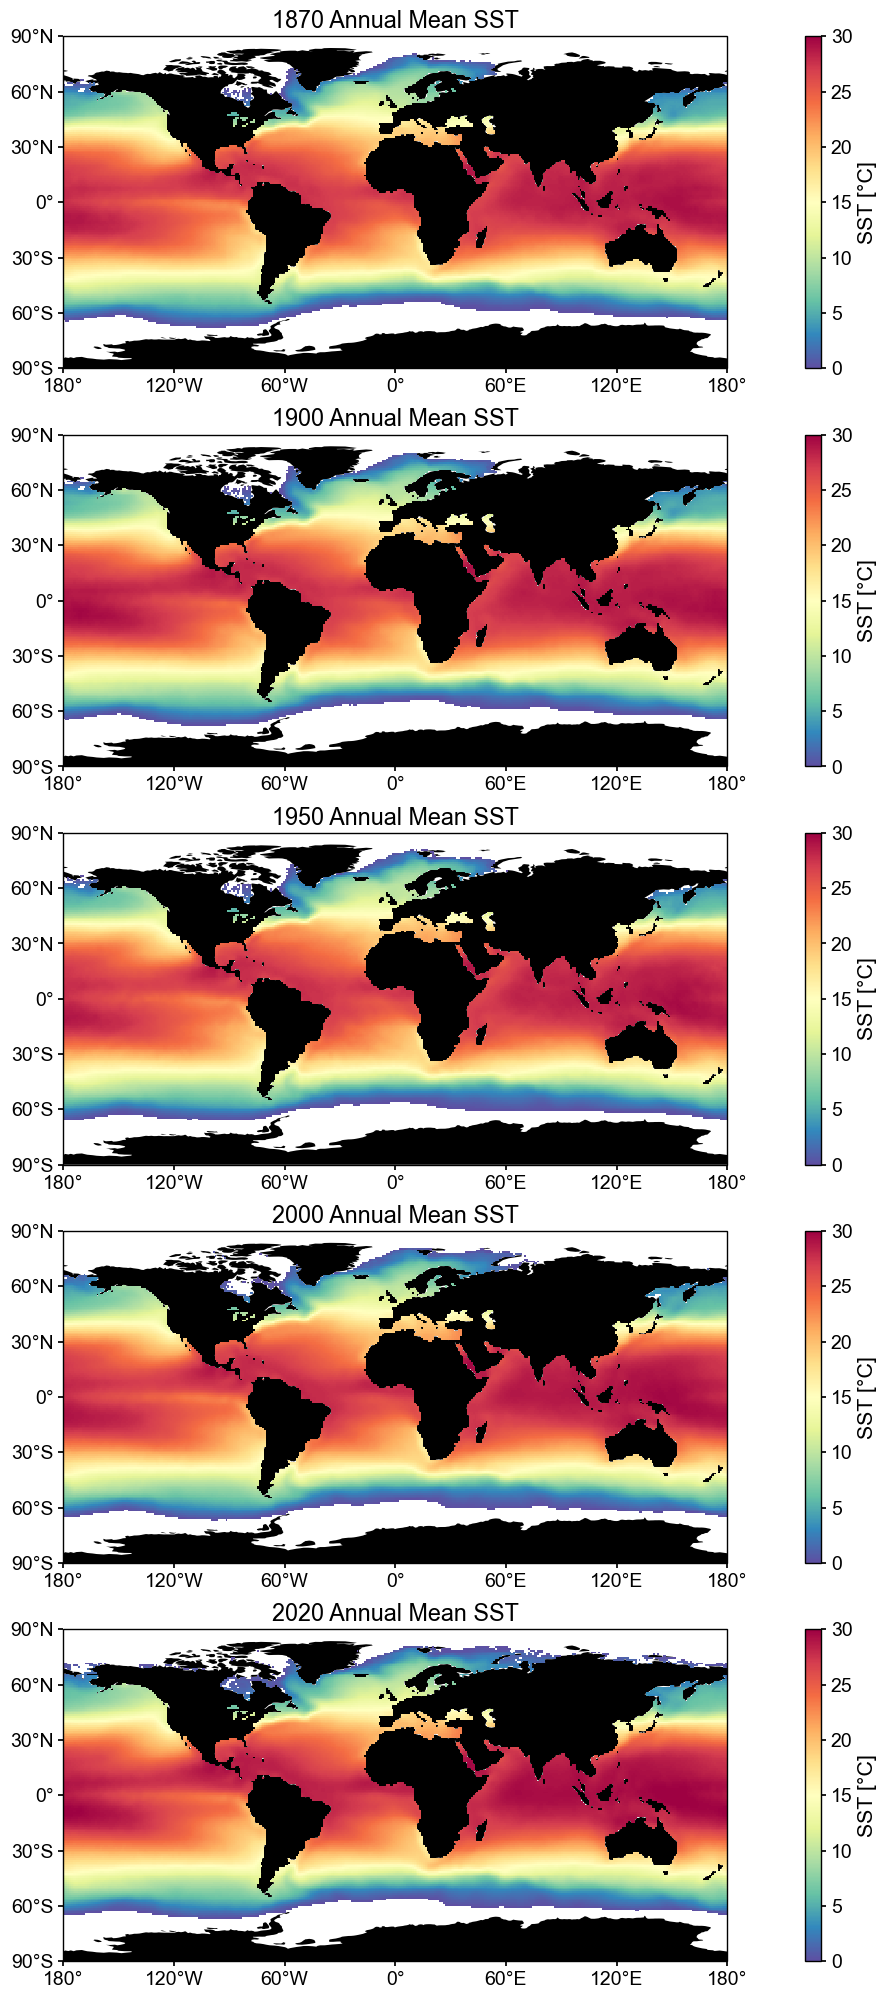

In [115]:
sst1870 = df.isel(time = slice(0,12)).mean('time')
sst1900 = df.isel(time = slice(360, 372)).mean('time')
sst1950 = df.isel(time = slice(960, 972)).mean('time')
sst2000 = df.isel(time = slice(1560, 1572)).mean('time')
sst2020 = df.isel(time = slice(1800,1812)).mean('time')

fig, axarr = plt.subplots(nrows = 5, figsize = [20,25],subplot_kw={'projection':ccrs.PlateCarree()})
axarr = axarr.flatten()

datasets = [sst1870, sst1900, sst1950, sst2000, sst2020]
titles = ['1870', '1900', '1950', '2000', '2020']
n = 0
for ax in axarr:
    
    data = datasets[n]
    [lon,lat] = np.meshgrid(data['longitude'],data['latitude'])
    im = ax.pcolormesh(lon, lat, data['sst'].where(data['sst'] > 0), cmap = 'Spectral_r', vmin = 0, vmax = 30)
    cbar = plt.colorbar(im, ax = ax, orientation = 'vertical', fraction = 0.05, pad = 0.05)
    cbar.set_label('SST [°C]')
    title = titles[n] + ' Annual Mean SST'
    ax.set_title(title)

    # Formatting things
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.add_feature(cart.feature.LAND, facecolor='black')
    
    n = n + 1

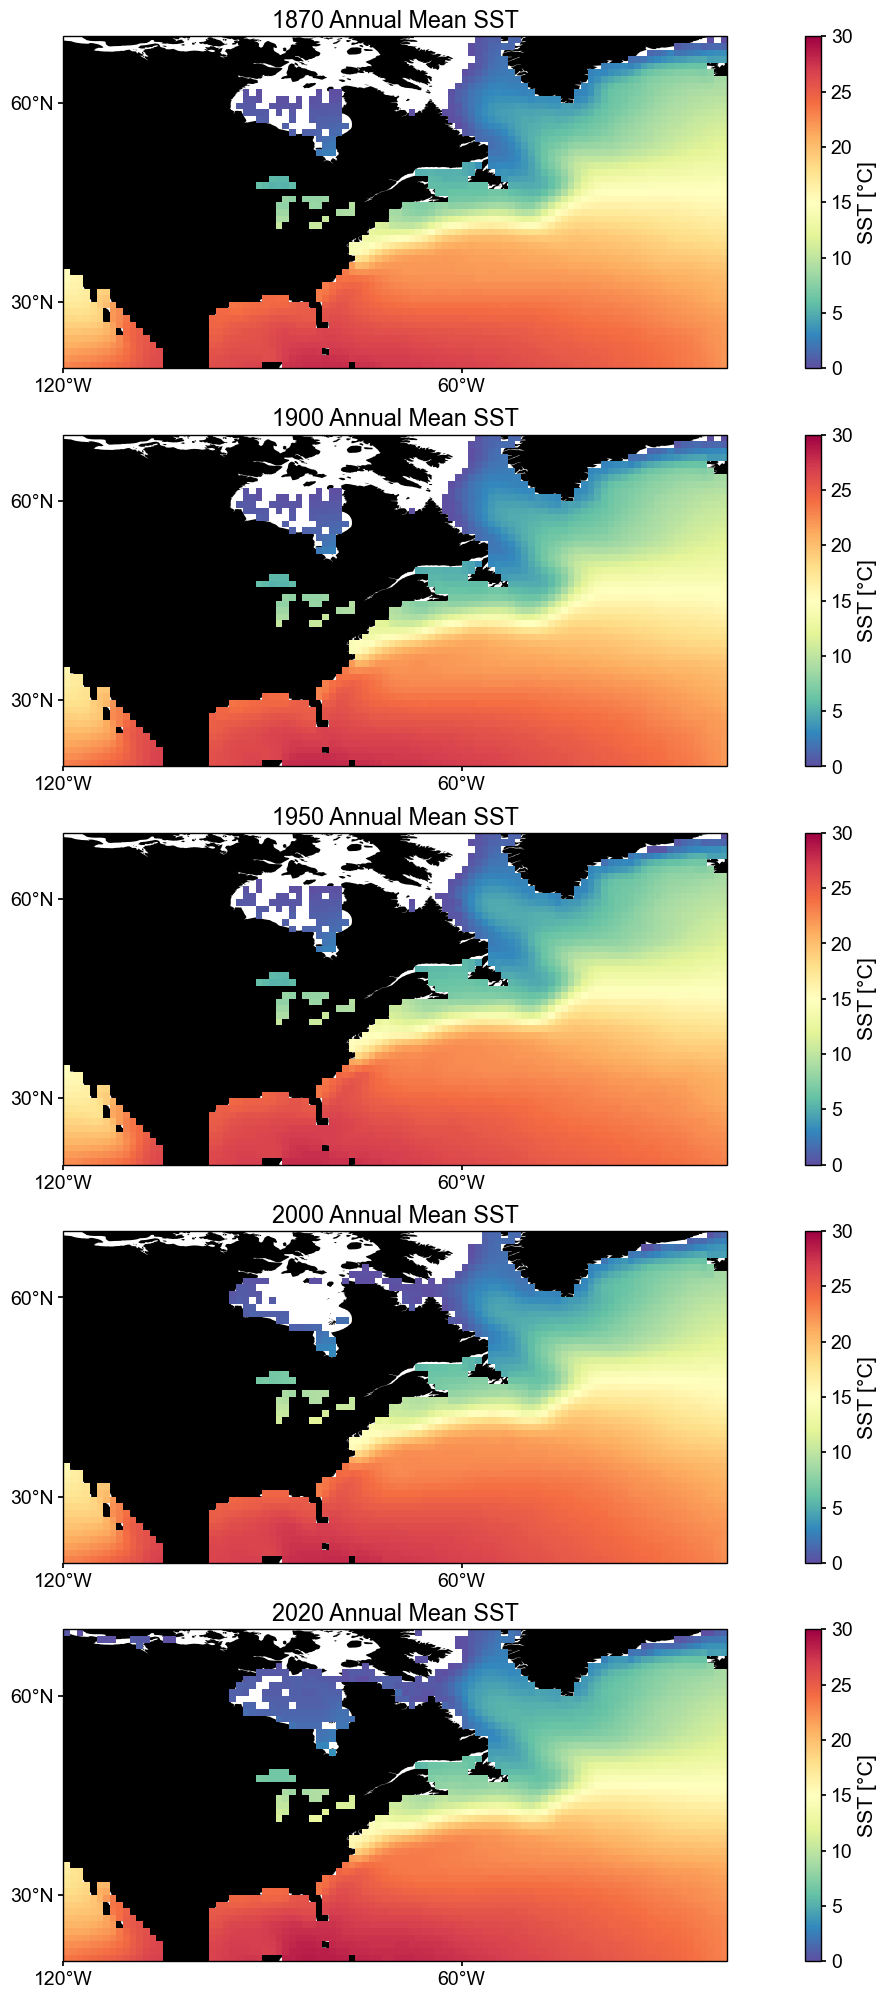

In [181]:
sst1870 = df.isel(time = slice(0,12)).mean('time')
sst1900 = df.isel(time = slice(360, 372)).mean('time')
sst1950 = df.isel(time = slice(960, 972)).mean('time')
sst2000 = df.isel(time = slice(1560, 1572)).mean('time')
sst2020 = df.isel(time = slice(1800,1812)).mean('time')

fig, axarr = plt.subplots(nrows = 5, figsize = [20,25],subplot_kw={'projection':ccrs.PlateCarree()})
axarr = axarr.flatten()

datasets = [sst1870, sst1900, sst1950, sst2000, sst2020]
titles = ['1870', '1900', '1950', '2000', '2020']
n = 0
for ax in axarr:
    
    data = datasets[n]
    [lon,lat] = np.meshgrid(data['longitude'],data['latitude'])
    im = ax.pcolormesh(lon, lat, data['sst'].where(data['sst'] > 0), cmap = 'Spectral_r', vmin = 0, vmax = 30)
    cbar = plt.colorbar(im, ax = ax, orientation = 'vertical', fraction = 0.05, pad = 0.05)
    cbar.set_label('SST [°C]')
    title = titles[n] + ' Annual Mean SST'
    ax.set_title(title)

    # Formatting things
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    ax.set_xlim([-120,-20])
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    ax.set_ylim([20,70])
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.add_feature(cart.feature.LAND, facecolor='black')
    
    n = n + 1

# Change in Temp from 1870 to 2020

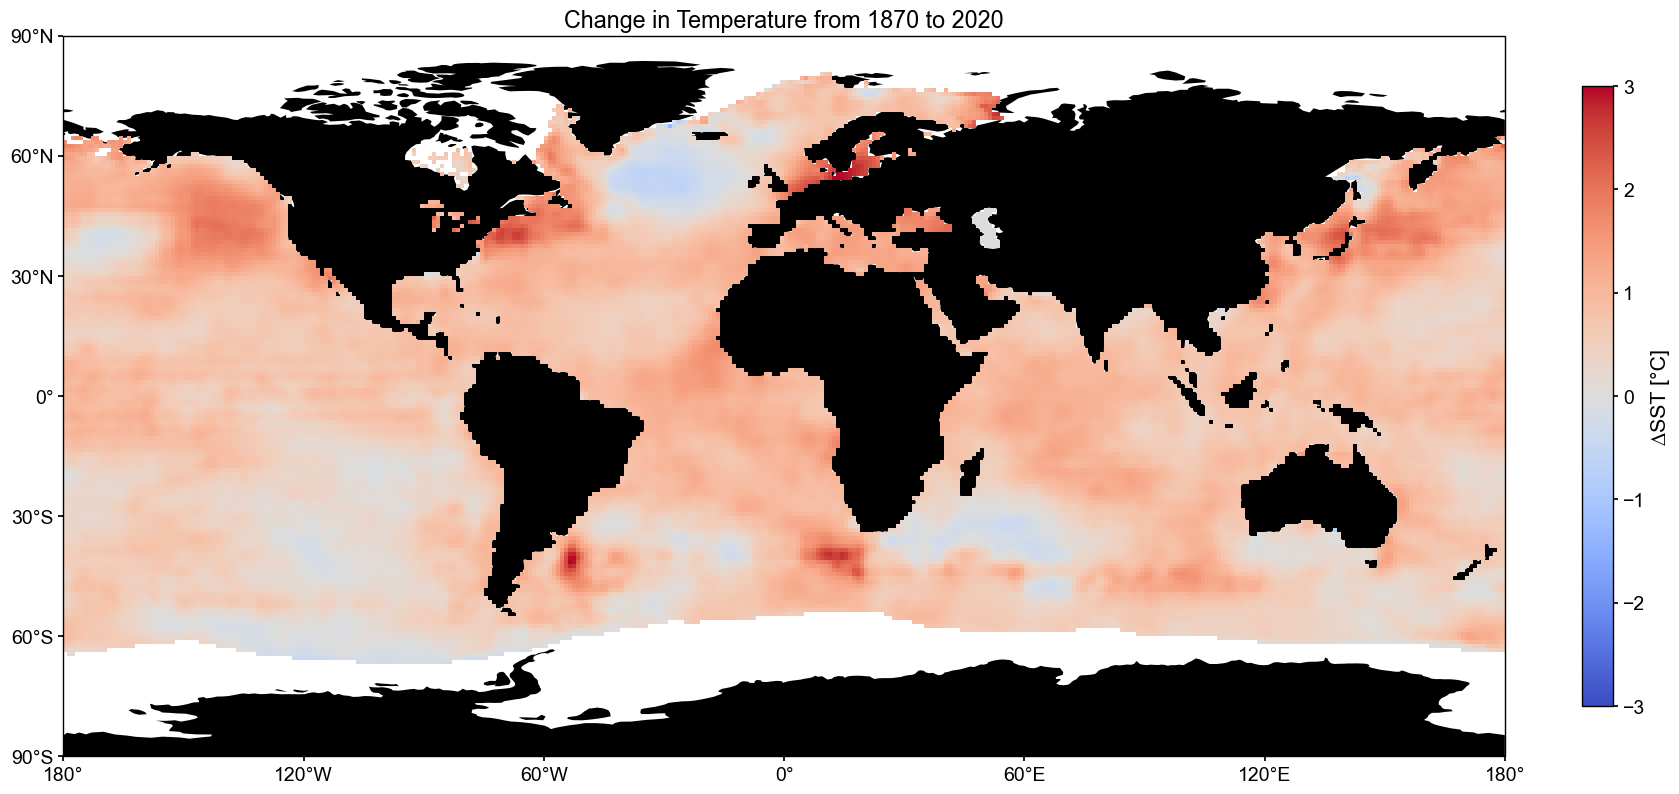

In [119]:
sst1870 = df.isel(time = slice(0,12)).mean('time')
sst1900 = df.isel(time = slice(360, 372)).mean('time')
sst1950 = df.isel(time = slice(960, 972)).mean('time')
sst2000 = df.isel(time = slice(1560, 1572)).mean('time')
sst2020 = df.isel(time = slice(1800,1812)).mean('time')

fig, ax = plt.subplots(figsize = [20,20],subplot_kw={'projection':ccrs.PlateCarree()})

data = sst1870
data2 = sst2020
[lon,lat] = np.meshgrid(data['longitude'],data['latitude'])
dSST = data2['sst'].where(data2['sst'] > 0) - data['sst'].where(data['sst'] > 0)
im = ax.pcolormesh(lon, lat, dSST, cmap = 'coolwarm', vmin = -3, vmax = 3)
cbar = plt.colorbar(im, ax = ax, orientation = 'vertical', fraction = 0.02, pad = 0.05)
cbar.set_label('∆SST [°C]')
ax.set_title('Change in Temperature from 1870 to 2020')

# Formatting things
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cart.feature.LAND, facecolor='black')
    


(20.0, 70.0)

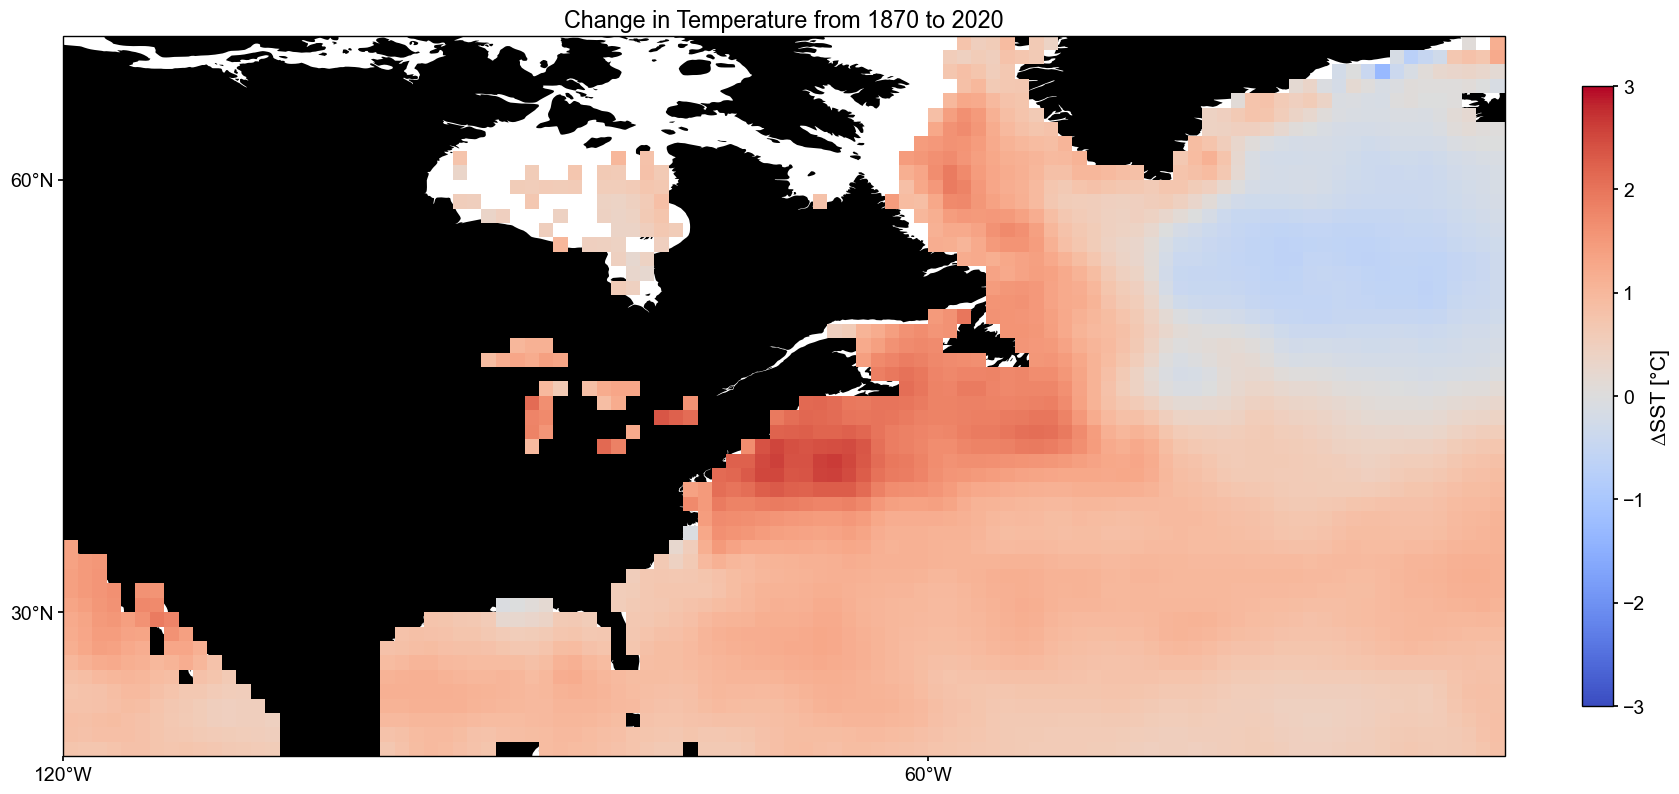

In [184]:
sst1870 = df.isel(time = slice(0,12)).mean('time')
sst1900 = df.isel(time = slice(360, 372)).mean('time')
sst1950 = df.isel(time = slice(960, 972)).mean('time')
sst2000 = df.isel(time = slice(1560, 1572)).mean('time')
sst2020 = df.isel(time = slice(1800,1812)).mean('time')

fig, ax = plt.subplots(figsize = [20,20],subplot_kw={'projection':ccrs.PlateCarree()})

data = sst1870
data2 = sst2020
[lon,lat] = np.meshgrid(data['longitude'],data['latitude'])
dSST = (data2['sst'].where(data2['sst'] > 0) - data['sst'].where(data['sst'] > 0))
im = ax.pcolormesh(lon, lat, dSST, cmap = 'coolwarm', vmin = -3, vmax = 3)
cbar = plt.colorbar(im, ax = ax, orientation = 'vertical', fraction = 0.02, pad = 0.05)
cbar.set_label('∆SST [°C]')
ax.set_title('Change in Temperature from 1870 to 2020')

# Formatting things
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cart.feature.LAND, facecolor='black')
ax.set_xlim([-120,-20])
ax.set_ylim([20,70])


# Change in Temperature from 1950 to 2020

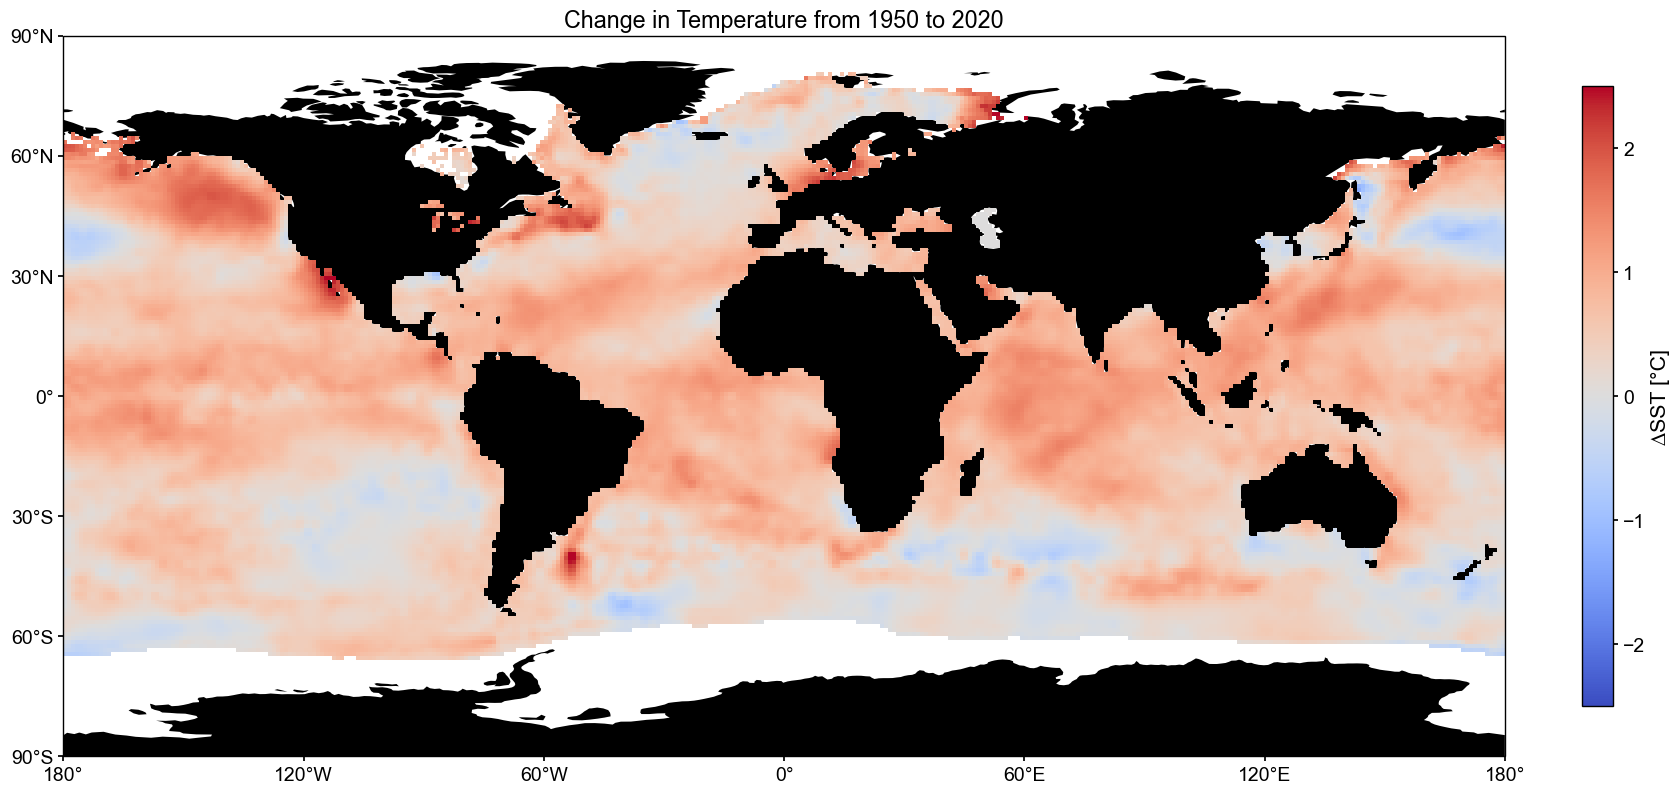

In [121]:
sst1870 = df.isel(time = slice(0,12)).mean('time')
sst1900 = df.isel(time = slice(360, 372)).mean('time')
sst1950 = df.isel(time = slice(960, 972)).mean('time')
sst2000 = df.isel(time = slice(1560, 1572)).mean('time')
sst2020 = df.isel(time = slice(1800,1812)).mean('time')

fig, ax = plt.subplots(figsize = [20,20],subplot_kw={'projection':ccrs.PlateCarree()})

data = sst1950
data2 = sst2020
[lon,lat] = np.meshgrid(data['longitude'],data['latitude'])
dSST = data2['sst'].where(data2['sst'] > 0) - data['sst'].where(data['sst'] > 0)
im = ax.pcolormesh(lon, lat, dSST, cmap = 'coolwarm', vmin = -2.5, vmax = 2.5)
cbar = plt.colorbar(im, ax = ax, orientation = 'vertical', fraction = 0.02, pad = 0.05)
cbar.set_label('∆SST [°C]')
ax.set_title('Change in Temperature from 1950 to 2020')

# Formatting things
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cart.feature.LAND, facecolor='black')
    


(20.0, 70.0)

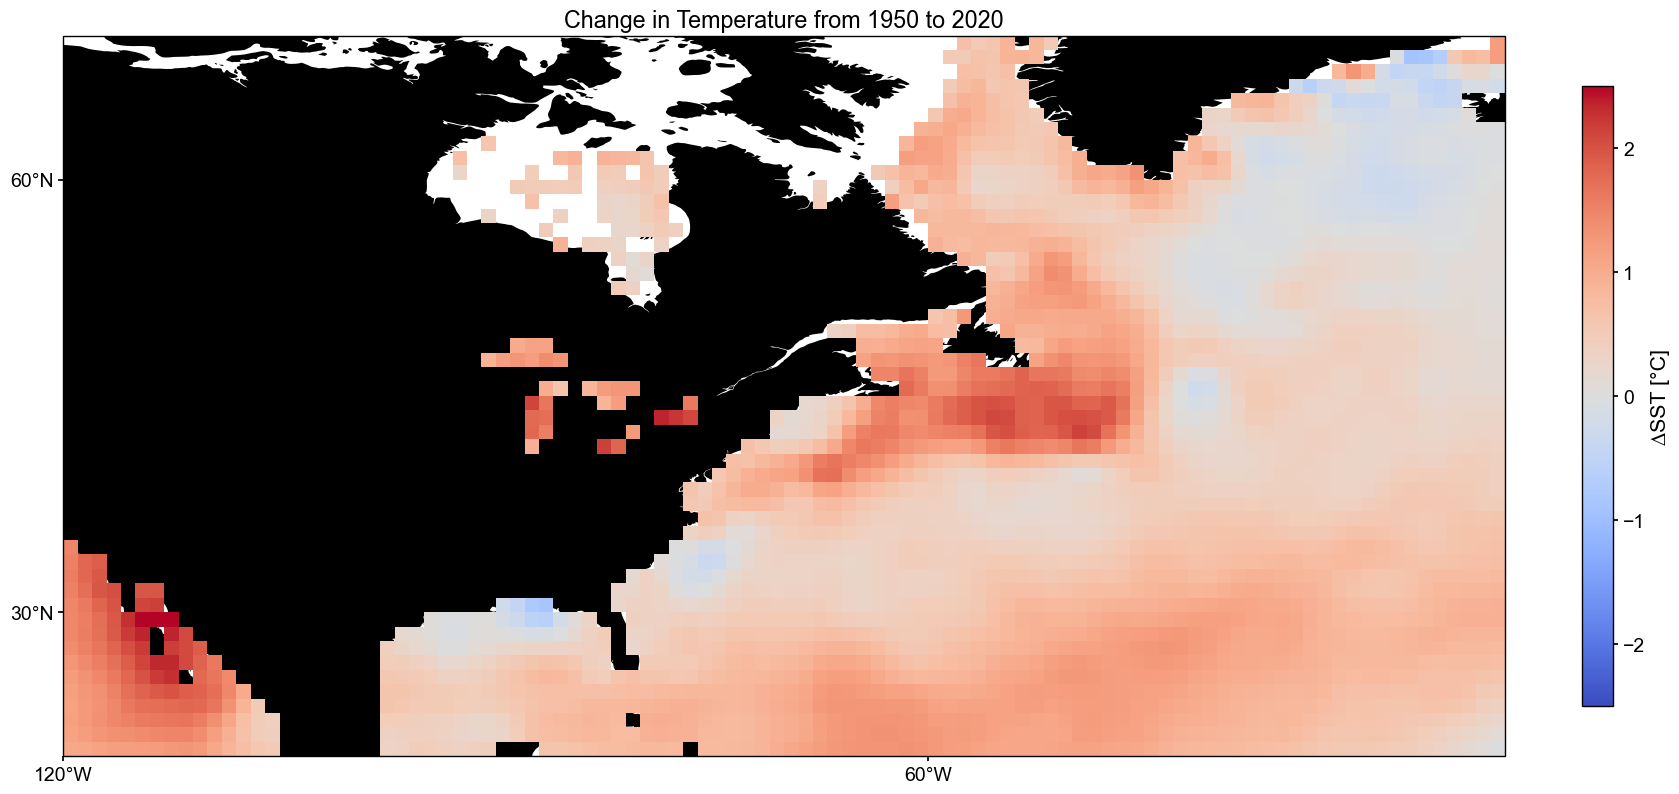

In [185]:
sst1870 = df.isel(time = slice(0,12)).mean('time')
sst1900 = df.isel(time = slice(360, 372)).mean('time')
sst1950 = df.isel(time = slice(960, 972)).mean('time')
sst2000 = df.isel(time = slice(1560, 1572)).mean('time')
sst2020 = df.isel(time = slice(1800,1812)).mean('time')

fig, ax = plt.subplots(figsize = [20,20],subplot_kw={'projection':ccrs.PlateCarree()})

data = sst1950
data2 = sst2020
[lon,lat] = np.meshgrid(data['longitude'],data['latitude'])
dSST = data2['sst'].where(data2['sst'] > 0) - data['sst'].where(data['sst'] > 0)
im = ax.pcolormesh(lon, lat, dSST, cmap = 'coolwarm', vmin = -2.5, vmax = 2.5)
cbar = plt.colorbar(im, ax = ax, orientation = 'vertical', fraction = 0.02, pad = 0.05)
cbar.set_label('∆SST [°C]')
ax.set_title('Change in Temperature from 1950 to 2020')

# Formatting things
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cart.feature.LAND, facecolor='black')
ax.set_xlim([-120,-20])
ax.set_ylim([20,70])    


# Global Mean SST change

Text(0.5, 1.0, 'Global Mean SST')

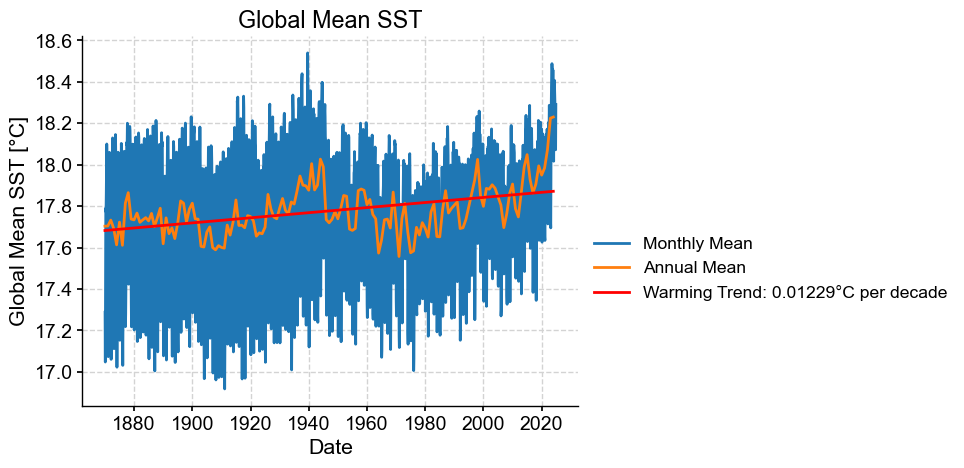

In [165]:
globalSST = df.where(df['sst'] >= 0).mean(['longitude', 'latitude'])
SSTyear = df.where(df['sst'] >= 0).mean(['longitude', 'latitude'])

fig, ax = plt.subplots()

ax.plot(globalSST.time, globalSST['sst'], label = 'Monthly Mean')


SSTyear = globalSST.groupby(globalSST['time'].dt.year).mean()
years = []
for i in SSTyear.year:
    years.append(datetime(i.values,1,1))

ax.plot(years, SSTyear.sst, label = 'Annual Mean')

x = SSTyear.year.values
x = x.reshape(-1,1)
y = SSTyear['sst']
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
cff = "%.5f" % (regression_model.coef_ * 10)
intcpt = "%.3f" % regression_model.intercept_
RMSE = "%.3f" % rmse
R2 = "%.3f" % r2
    
# lbl = cff + ' x + ' + intcpt + ' = y\nRMSE = ' + RMSE + '\nR2 = ' + R2
lbl = 'Warming Trend: ' + cff + '°C per decade'
ax.plot(years, y_predicted, color = 'red', label = lbl)
ax.legend(bbox_to_anchor = (1,0.5))
ax.set_xlabel('Date')
ax.set_ylabel('Global Mean SST [°C]')

ax.set_title('Global Mean SST')

# Temperature Variability


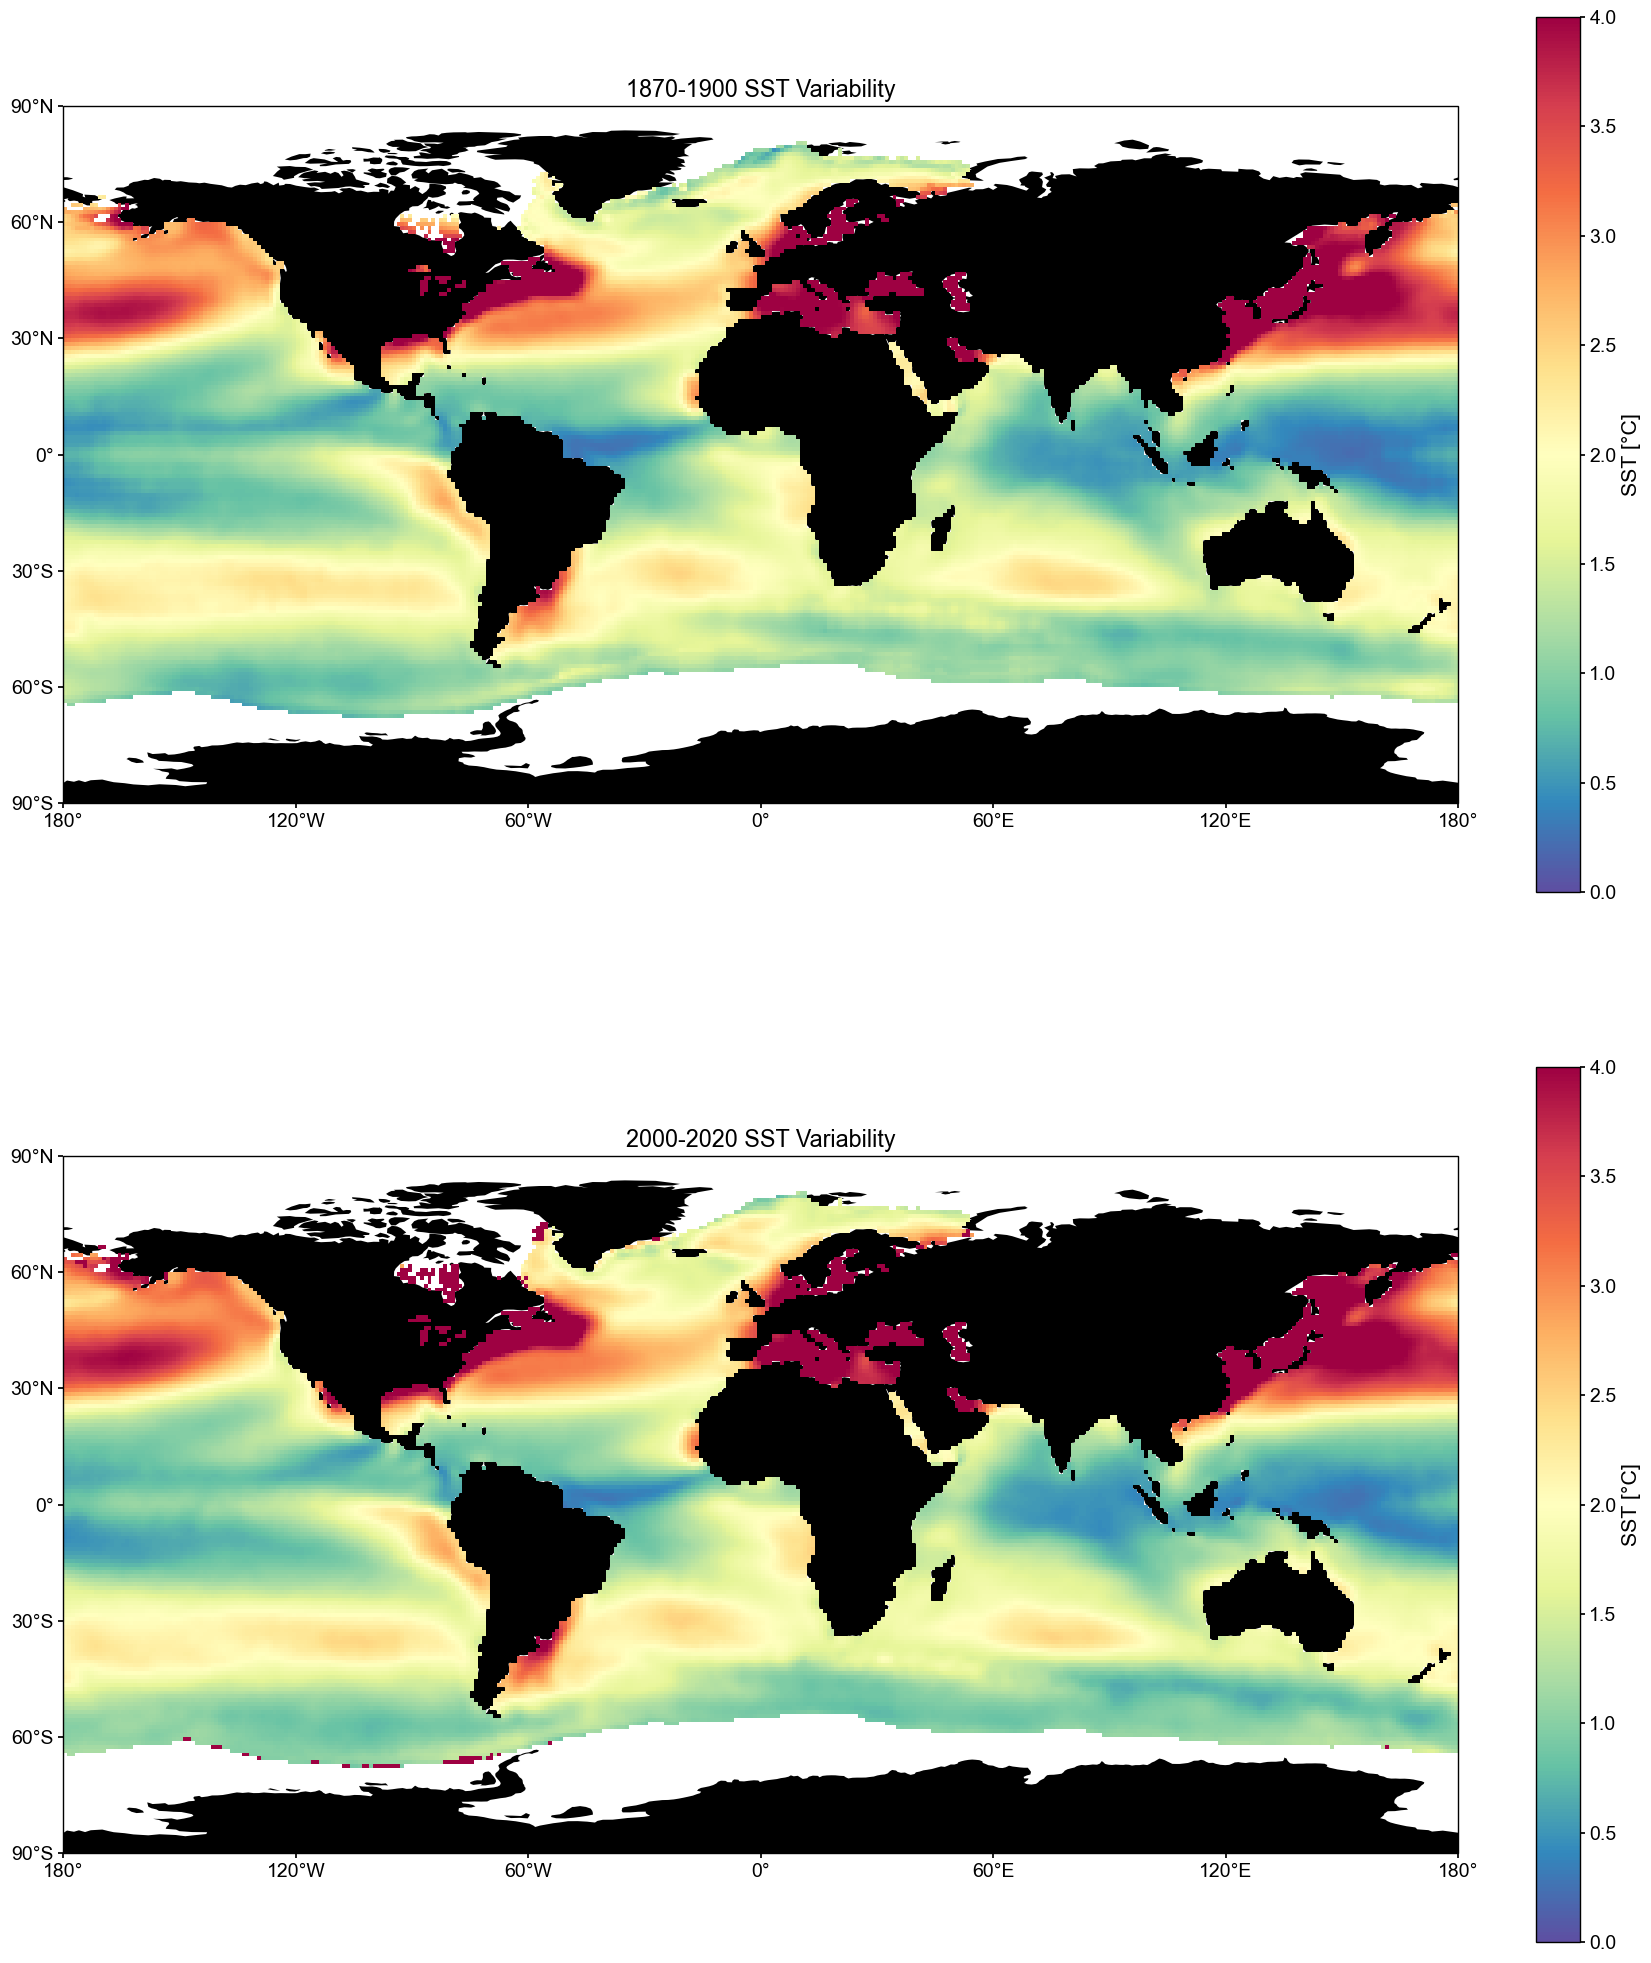

In [186]:
sst1900 = df.isel(time = slice(0,372)).std('time', ddof = 1) # 1870 thru 1900
sst2000 = df.isel(time = slice(1560,1812)).std('time', ddof = 1) # 2000 thru 2020

fig, axarr = plt.subplots(nrows = 2, figsize = [20,25],subplot_kw={'projection':ccrs.PlateCarree()})
axarr = axarr.flatten()

datasets = [sst1900, sst2000]
titles = ['1870-1900', '2000-2020']
n = 0
for ax in axarr:
    
    data = datasets[n]
    [lon,lat] = np.meshgrid(data['longitude'],data['latitude'])
    im = ax.pcolormesh(lon, lat, data['sst'].where(sst1870['sst'] > 0) , cmap = 'Spectral_r', vmin = 0, vmax = 4)
    cbar = plt.colorbar(im, ax = ax, orientation = 'vertical', fraction = 0.05, pad = 0.05)
    cbar.set_label('SST [°C]')
    title = titles[n] + ' SST Variability'
    ax.set_title(title)

    # Formatting things
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.add_feature(cart.feature.LAND, facecolor='black')
    # ax.set_xlim([-120,-20])
    # ax.set_ylim([20,70])
    
    n = n + 1

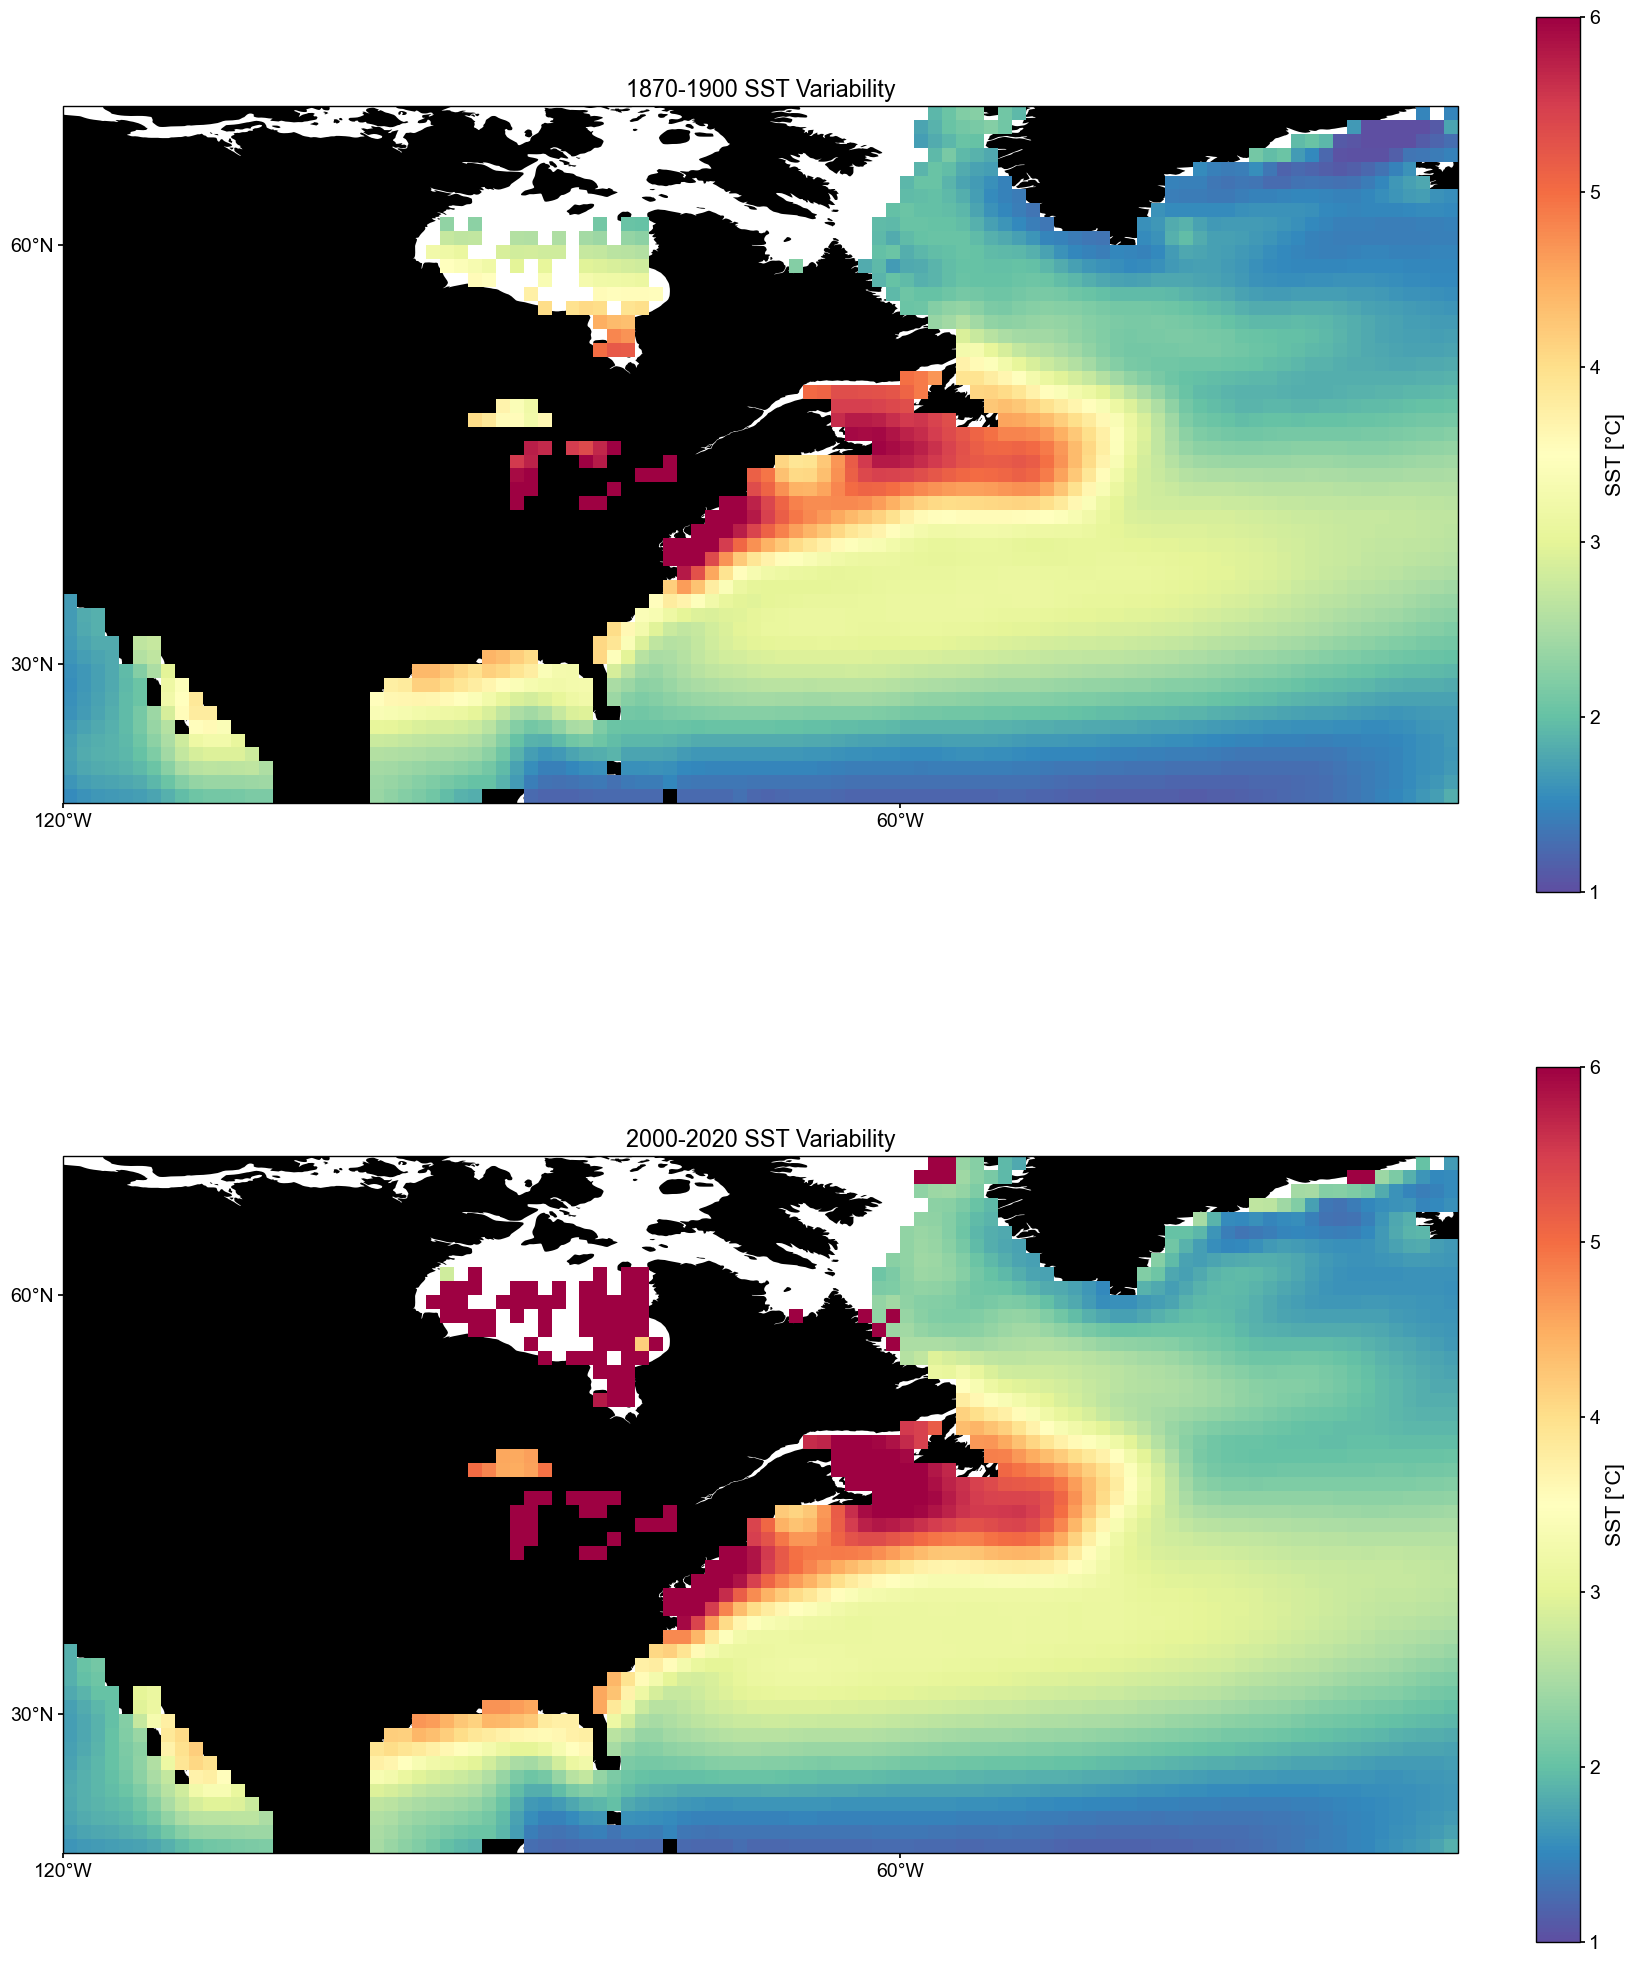

In [189]:
sst1900 = df.isel(time = slice(0,372)).std('time', ddof = 1) # 1870 thru 1900
sst2000 = df.isel(time = slice(1560,1812)).std('time', ddof = 1) # 2000 thru 2020

fig, axarr = plt.subplots(nrows = 2, figsize = [20,25],subplot_kw={'projection':ccrs.PlateCarree()})
axarr = axarr.flatten()

datasets = [sst1900, sst2000]
titles = ['1870-1900', '2000-2020']
n = 0
for ax in axarr:
    
    data = datasets[n]
    [lon,lat] = np.meshgrid(data['longitude'],data['latitude'])
    im = ax.pcolormesh(lon, lat, data['sst'].where(sst1870['sst'] > 0) , cmap = 'Spectral_r', vmin = 1, vmax = 6)
    cbar = plt.colorbar(im, ax = ax, orientation = 'vertical', fraction = 0.05, pad = 0.05)
    cbar.set_label('SST [°C]')
    title = titles[n] + ' SST Variability'
    ax.set_title(title)

    # Formatting things
    ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.add_feature(cart.feature.LAND, facecolor='black')
    ax.set_xlim([-120,-20])
    ax.set_ylim([20,70])
    
    n = n + 1